**Christian Music - Analytical Comparison between CTM and CCM**



*   Author: William Ignatius Wijaya
*   Digital Humanities 100 Summer 2021
*   Intructor: Dr. Adam Anderson


# **A. Project Description and EDA questions**

Christian Music has a very interesting history in it. From being rejected by different culture and ethnic groups, and now it is accepted by more people nowadays. As a person who loves to hear Christian music, I do not lean toward one type of Christian Music, whether it is traditional or contemporary, as both of the genres serve the same purpose, i.e., to praise and bring glory to the Father. In this project, I want to compare two of the most common Christian Music genres: Christian Traditional Music (CTM) and Christian Contemporary Music (CCM). I want to compare how do they deliver the song to the audience differently given that the creation of both genres have the same purpose.

The EDA questions will be listed below as a guide this project exploration:



*   Are the top rated songs unique? Or are they similar to each other?
*   What kind of emotions do people have while listening to CTM and CCM?
*   How is the word choice between CTM and CCM differs?
*   How CTM and CCM differs in term of their audio features?










# **B. Data Collection** 

I will be using John Miller's Phyton Package that is available in his Github. This package wraps the Genius.com API to import lyrics into Jupyter notebook. 

Also, I will be using Hudson Brendon's Phyton Package that is available in his Github. This package wraps musixmatch.com API to import the lyric into Jupyter Notebook.

The link to John Miller's and Hudson Brendon's github is available on the work cited section.

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import re

In [ ]:
!pip install wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import Counter
from google.colab import files
from nltk.corpus import wordnet
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install scipy
from scipy.stats import norm

In [ ]:
pip install lyricsgenius

In [ ]:
import lyricsgenius

In [ ]:
pip install pymusixmatch

In [ ]:
pip install spotipy

In [ ]:
pip install seaborn

Before using this package, I'll need to sign up for a (free) account that authorized the access to Genius, musixmatch, and spotify API. After that, the genius and musixmatch website will provide me a client_access token that will be required for the package. And, the Spotify will provide me cliend id and client secret id.

In [ ]:
genius = lyricsgenius.Genius("Flx2wj43D1kz4WGAyqDwFt_C1ukA72zsF6nThQD1-Gs0Y05j2itUEIVf8tze5HSM")

In [ ]:
from musixmatch import Musixmatch

musixmatch = Musixmatch("24f9aa2531593e44d087b9aedfa8f8dd")

In [ ]:
# Sometimes this code generates an error. Restart runtime then try to run it again. It should work.
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = '5052e48a7df14cacb9d6cebae51d2326'
secret = 'e37bec743e0244f2a952b8071d2af737'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

For constructing the dataset, I will search the top 50 songs from spotify for both genres (CTM and CCM). Then, I will search for the lyrics using Genius and musixmatch API  for each of the songs. If the lyrics is not available on Genius and musixmatch, then the song will not be included in my dataset 

Other than that, I will search the audio features using spotify API combined with spotipy. This will pull out the audio features analysis by spotify, which will be used to answer the EDA question for : "How CTM and CCM differs in term of their audio components?"


**CTM data preparation**



*   I will be constructing CTM_title and CTM_artist variables. CTM_title is 
the title of the song, while CTM_artist is the artist of the song. For example, title of the song is "O My Soul" with artist of "Sovereign Grace Music" found using Genius.
*   The lyrics of CTM songs are available in genius and/or musixmatch. If the lyrics of CTM songs are not available in either genius or musixmatch, then the song will not be included in the dataset. In addition, all CCM songs lyrics are available from Genius, so there is no need for lyric reference using musixmatch. 
*   The spotify track ID is used to search for the audio analysis of a particular song from Spotify. The track ID data is organized sequentially in accordance with the title of the song. The track ID is obtained from Spotify by searching for each song link (each song link contains the track id in it) and then the track ids are inputted manually into the notebook.


In [ ]:
# CTM title using Genius.com
CTM_title_Genius=["O My Soul, Arise","Jesus Loves Me (This I know)","Wonderful Grace of Jesus",
            "It Is Well With My Soul","I Shall Not Want","Holy, Holy, Holy","Here Is Love",
            "This Is My Father’s World","Facing a Task Unfinished","Wonderful Merciful Savior",
            "We Will Glorify","Your Grace Still Amazes Me","I Surrender All","For the Beauty of the Earth",
            "I Asked the Lord","Be thou my vision","Brethren We Have Met To Worship",
            "Nobody Loves Me Like You","This Ole House"] 

#CTM artists using Genius.com
CTM_artists_Genius=["Sovereign Grace Music","Michael Card","The Cathedral Quartet","Chris Rice",
            "Audrey Assad","Alvin Slaughter","Fernando Ortega","Fernando Ortega","Keith & Kristyn Getty",
            "Phillips, Craig & Dean","Twila Paris","Phillips, Craig & Dean","Citizens","BarlowGirl",
            "Indelible Grace Music","The Lower Lights","Bart Millard","Chris Tomlin","Shakin’ Stevens"]

#CTM Spotify track ID taken from Genius.com
CTM_spotify_Genius=["4Zkb030NKRSAFhIpxw9AYz","7dKEg9rTno5arNr2Ru2Fd8","5KgcFAAAkx99jJkujUbxfs",
                    "77gH6juaBnse3ejueEeAsX","0mqzgnVlw2f5qBeRAnznDb","5iIG13REuSlBXHKV05jZAb",
                    "3r78CRZnVEU8jbmwYDFURp","4MAzKUxW9xY5mgRv8Wzq8Y","1IQpa7FUgLmlfUNLR7nE1l",
                    "1TRvQkC86afnxXdstu8Js1","6VTThirUNZAyyI7n2Hob88","5RU6uu0ZHGjrIxMqGUe8hY",
                    "4kJ8QpuxVclIxZ5GTvG8pv","2J2Yg3hENQEDY8C3yCWGQH","62cH46leoJPg1SAxLom9G3",
                    "5Dl6FoHQnYlfMDOMCBFrRp","3KQNetohMPhC1JdBDU7esw","3z4PYfQa7Y4Pyn1vYJj9NC",
                    "5pG5BTs0blu1VVQujheBMP"]

#CTM title using musixmatch.com         
CTM_title_musixmatch=["I Can Pray","Plead for Me","Search Me, O God","Grace Unmeasured",
                      "Go Ye","More Love","Lord, Bless Our Home","Settled At the Cross",
                      "Power in the Blood","Praise Him, Praise Him","No Good Thing",
                      "My Hope Is Built on Nothing Less (On Christ The Solid Rock)",
                      "So High the Price","Lord Most High","Deep on My Heart","God Knows",
                      "When I Survey the Wondrous Cross","He Will Quiet You","Trust His Heart",
                      "May the Lord find us Faithful","Jesus Paid It All","Constantly Abiding",
                      "Before the Throne of God Above","You Are the Christ","When Love Came Down",
                      "I Don't Wanna Leave","His Robes for Mine","Be Thou My Vision","Sweet Beulah Land",
                      "My Hope Is Jesus","Behold Our God"]

#CTM artists using musixmatch.com                    
CTM_artists_musixmatch=["The Clark Family","Coffey Ministries","Truth","Sovereign Grace Music",
                        "Ron Hamilton feat. Shelly Hamilton","Steve Pettit Evangelistic Team",
                        "Ron Hamilton","Steve Pettit Evangelistic Team","Coffey Ministries",
                        "Joslin Grove Choral Society","Herbster Trio","Robert Critchley",
                        "Steve Pettit Evangelistic Team","Women Of Faith","The Wilds",
                        "Cody Johns","Cliff Richard","Galkin Evangelistic Team","Joyful Melodies",
                        "Karen Maucher","Newsboys", "Dino","Sovereign Grace Music, Bob Kauflin",
                        "The Wilds","Dave Hunt","William McDowell",
                        "Ron Hamilton feat. Shelly Hamilton","Audrey Assad","Mike Purkey","Hamilton Family",
                        "Sovereign Grace Music"]

#CTM Spotify track ID taken from musixmatch.com
CTM_spotify_musixmatch=["6TkJyvFGKj8U1UTTviDOJy","36wNo3rScYwUhlGpbZE5yP","5AeK1jtZfLhwqmQnmYTqjT",
                        "4iHiki1pRp55AbAhHQvIkH","3pyZVlQ1EU9JaFZk0jMnIO","426SMvLLg0gcr1NYPojiOd",
                        "63PihqpiVu0tmdPSB0DicJ","3qSMQEjToSINdNLCiYZpf4","45LIF71NiAqY14IxAJ6dAr",
                        "66ORiYAKRUrDknjokwFBTL","3FwHHEUCvBAilWxQbMHlfF","5Lc2NGLEyFUhoPGI9kdTlL",
                        "6pMVtpZkR5Z2njoBXa71Q9","0tFV7r584GZjlGAySDcal6","1RcMyB6toGOuBK3oMcMwc4",
                        "6FVfcowRmpcW4BJWjKdF5F","6tGz53vLHX6rKpdtITET9K","1TxxTiHXyGaFzgmKcpMoxb",
                        "6CZTcTHeOPmvS4TH8xb8HN","0rMvvLGU0i4STzZDgXR3XJ","7vp4aS2ltoKHfOR5FjqEAx",
                        "3DGhpEOreNEJ1kXz3XdqPE","4PSPkUQndoGbD20ngLeHrg","5P33n5mBbDmHhgje4oPbVe",
                        "1bHbIgHf6849xGPOxBJdCv","66aefvqRy1HqtzxKXMFGtC","4D08BZncgfRPKBANFDapfi",
                        "06BYwrJJOGrbXKN4mRtcHa","4xKT04WZjJDSjeMI5jp3Z1","4xLuO3vgPsgXwR0xnVqOGV",
                        "5wtsUVV88h9jhtF4mOgxNN"]

In [ ]:
# CCM title using Genius.com
CCM_title_Genius=["RATTLE! (Live)","Awake My Soul","Way Maker (Live)","Breakthrough (Live)",
                  "The Blessing","Raise a Hallelujah (Live)","Hindsight",
                  "Echoes (Till We See the Other Side) [Live]","Who You Say I Am (Live)",
                  "It Is So","It Is Finished (Live)","O Come to the Altar","Oceans (Where Feet May Fail)",
                  "This Is Living","See the Light","King of Kings", "Christ Is Enough","Lord I Need You",
                  "Ready or Not (Live)","Alive (Live)","Holy Spirit","Graves Into Gardens (Live)",
                  "Cornerstone (Live)","This is Amazing Grace", "This I Believe (The Creed) [Live]",
                  "Good Grace (Live)", "Grace to Grace","Wake (Live)","Resurrecting","No Longer Slaves",
                  "You Make Me Brave (Live)","O Praise The Name (Anástasis)","Revelation Song (Live)",
                  "What a Beautiful Name (Live)","New Wine (Live)","Here as in Heaven","Fullness",
                  "Unstoppable God","So Will I (100 Billion X)","Broken Vessels (Amazing Grace) [Live]",
                  "Echo","Do It Again","Scandal of Grace","Whom Shall I Fear (God of Angel Armies)",
                  "You Are Life (Live)","Great Are You Lord","Upper Room","There Is a Cloud",
                  "Only Wanna Sing (Live)","Center My Life (Live)"]

# CCM artists using Genius.com
CCM_artists_Genius=["Elevation Worship","Hillsong Worship","Leeland","Red Rocks Worship",
                    "Elevation Worship","Bethel Music","Hillsong Young & Free","Hillsong UNITED",
                    "Hillsong Worship","Elevation Worship","Passion","Elevation Worship",
                    "Hillsong UNITED","Hillsong Young & Free","Hillsong Worship","Hillsong Worship",
                    "Hillsong Worship","Matt Maher","Hillsong UNITED","Hillsong Young & Free",
                    "Francesca Battistelli","Elevation Worship","Hillsong Worship","Phil Wickham",
                    "Hillsong Worship","Hillsong UNITED","Hillsong Worship","Hillsong Young & Free",
                    "Elevation Worship","Bethel Music","Bethel Music","Hillsong Worship","Phil Wickham",
                    "Hillsong Worship","Hillsong Worship","Elevation Worship","Elevation Worship",
                    "Elevation Worship","Hillsong UNITED","Hillsong Worship","Elevation Worship",
                    "Elevation Worship","Hillsong UNITED","Chris Tomlin","Hillsong Worship",
                    "All Sons & Daughters","Hillsong Worship","Elevation Worship","Hillsong Young & Free",
                    "Austin Stone Worship"]

#CCM Spotify track ID taken from Genius.com

CCM_spotify_Genius=["6fdglWE2qycjtz0JlW94HW","6AvQ48ohekN6f2eqZCYICX","3BcPAGy6P7gWiL7DAPH85t",
                    "2jU1OyF5MLOZzJp2FJVw83","2elEVvWjPZltkotzcCwKvM","0YxrPdW9NpNFtqh7Fw0rva",
                    "4zSPAXEf1Z0jjfPeP5ERGf","6D1aJxoXnfsLCyelBTRXHD","2lUgap86Pux7qAgvWzuJWs",
                    "7rVrwI6qusX75vKxGK2dyv","6CAEUmlr6iQeJRqgJXkouf","1lEk3U3MzbDeL5MNHkE9JU",
                    "5Mw9bXG1dLNhbjofkVS2oR","6TCk1yecQRDU5sXG3vjTYj","1xIHfkc6IJB76YjB9EDcez",
                    "6kmhapLx51lmwhIIDFsUQU","1aqZ4wT92JwutkhYg6Law5","4EHWldZTas5KUyFtT0rQlY",
                    "1Jka8yydAs9Awv0vn3uEfZ","15Xg6XiDSrehKfy33CR5UW","0VqMBJyeeRA4I6mSPO5uqZ",
                    "4wc8FpW9XCUaoxtii3CiCf","5KTJJnSs2H1p5SaBXsG0Hb","5C64H6dEsQ15bS9gp0D3Xr",
                    "4Hrr4U80Rk1tWXlP8RFTAb","2pinjgWOCrGz7Yh7kJue1f","3gZKnV2SRnjdEY5M0vN4lJ",
                    "4YK48OgaAKpBEaRS7ZhCuf","1GtmiINnAu5K2VEqyh1Xdc","63SF10lPoWA71bDYYzxfUs",
                    "345RHjiEdIVedsxtiwGG7t","0FBm7M8icvVmPWDmyUNCGy","0hJ6SrXuS6QzA2mDdLwrM6",
                    "1yYUIjT3bZ9RB9vejqYy9f","1MX4dx6yNvAH2GjIVsUF4h","0fPwregqch9wLJj4yQH6Bk",
                    "1xO9OfHnego3yAYpBPc6kZ","7myOvrlSOO7VIyd7JQnSU0","1ed3wNCecRIp6SugyR0w2J",
                    "2BuhGnXpqMQ8BvOUZpmaVl","1MMk1Fw3vdYDRYj5cilHtt","3iOpiHDobxZO7S4p9Y2Fgu",
                    "0st2C7aLz9xkr7JyshhUHK","2VuwpxQR7rTPWkoLkpANdz","2hMLGqwoxtgB6ZoYJmeqq5",
                    "1Hv54MWloXiAZDam1ez840","5Trqe9O0VQEBe4aANs2qqS","2sn2gK89nnjXgJ0iLO4Gps",
                    "2ILMCXZVe2uiQ7095Zk4ye","6HndkGQ5RymiptDMVqwBII"]

Next, I will make two functions to create a dataframe for Genius and Musixmatch seperately. Then, I will concatenate the dataframe for Genius and Musixmatch into one dataframe by defining a function to concatenate the dataframe.

In [ ]:
# Part of this code is referenced from David Julio Panangian's notebook, see works cited
def create_dataframe_Genius(genre,genre_title,genre_artists,genre_spotify):
    df=pd.DataFrame()
    songs_title=genre_title[0:len(genre_title)]
    songs_artists=genre_artists[0:len(genre_artists)]
    #Loop through all songs in list
    for i in range(len(songs_title)):
        song=genius.search_song(songs_title[i], songs_artists[i])
        song_row=song.lyrics
        df=df.append([song_row], ignore_index=True)  

    #Rename Lyrics Column
    df=df.rename(columns={0: "lyrics"})

    #Clean Lyrics 
    df["lyrics"] = df["lyrics"].str.replace("\n", " ")
    df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)"
                                            , " ").str.strip()
    df["lyrics"] = df["lyrics"].str.replace("\\'", " ")
    df["lyrics"] = df['lyrics'].str.replace('[^\w\s]','')
    df["lyrics"] = df["lyrics"].str.lower()
    df["lyrics"] = df['lyrics'].str.replace(' don '," don't ")
    df["lyrics"] = df['lyrics'].str.replace('this lyrics is not for commercial use'," ")

    #Finalize DataFrame
    df["genre"]=genre
    df["title"]=genre_title
    df=df[["genre","title", "lyrics"]]

    # Extract audio features analysis by Spotify
    audio_json=sp.audio_features(tracks=genre_spotify)
    audio_normalized_json=pd.json_normalize(audio_json)
    audio=audio_normalized_json.drop(columns=["key","mode","type","id","uri","track_href","analysis_url","time_signature","duration_ms"])
    df=pd.concat([df, audio], axis=1)

    return df

In [ ]:
# Part of this code is referenced from David Julio Panangian's notebook, see works cited
def create_dataframe_musixmatch(genre,genre_title,genre_artists,genre_spotify):
    df=pd.DataFrame()
    songs_title=genre_title[0:len(genre_title)]
    songs_artists=genre_artists[0:len(genre_artists)]

    #Loop through all songs in list
    for i in range(len(songs_title)):
      # Get track in form of json file from musixmatch
      track_json=musixmatch.matcher_track_get(songs_title[i], songs_artists[i])
      # Extracting track id from json file
      normalized_track_json=pd.json_normalize(track_json)
      normalized_track_json[['track_id']]=normalized_track_json[['message.body.track.track_id']]
      track_id=normalized_track_json.track_id.item()
      # Get lyrics in form of json file
      lyrics_json=musixmatch.track_lyrics_get(track_id)
      # Extracting lyrics from json file
      normalized_lyrics_json=pd.json_normalize(lyrics_json)
      normalized_lyrics_json[['lyrics']]=normalized_lyrics_json[['message.body.lyrics.lyrics_body']]
      song_row=normalized_lyrics_json.lyrics.item()
      df=df.append([song_row], ignore_index=True) 
    
    #Rename Lyrics Column
    df=df.rename(columns={0: "lyrics"})

    #Clean Lyrics
    df["lyrics"] = df["lyrics"].str.replace("\n", " ")
    df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)"
                                            , " ").str.strip()
    df["lyrics"] = df["lyrics"].str.replace("\\'", " ")
    df["lyrics"] = df['lyrics'].str.replace('[^\w\s]','')
    df["lyrics"] = df["lyrics"].str.lower()
    df["lyrics"] = df['lyrics'].str.replace(' don '," don't ")
    df["lyrics"] = df['lyrics'].str.replace('this lyrics is not for commercial use'," ")

    #Finalize DataFrame
    df["genre"]=genre
    df["title"]=genre_title
    df=df[["genre","title", "lyrics"]]

    # Extract audio features analysis by Spotify
    audio_json=sp.audio_features(tracks=genre_spotify)
    audio_normalized_json=pd.json_normalize(audio_json)
    audio=audio_normalized_json.drop(columns=["key","mode","type","id","uri","track_href","analysis_url","time_signature","duration_ms"])
    df=pd.concat([df, audio], axis=1)

    return df

In [ ]:
def create_dataframe(df1,df2):
  # Concatenate df1 and df2 into one dataset
  df=pd.concat([df1, df2], axis=0)
  df=df.reset_index(drop=True)
  df.index = df.index + 1
  return df

Next, I will be constructing my dataset for both CTM and CCM using the variables and functions that I preapared. The dataset will have 13 columns in it. The lyrics is obtained by pulling out the lyrics from genius.com or musixmatch.com. The last 10 columns is obtained by using Spotify API combined with spotipy to pull out the audio features analysis by Spotify

Here is the description of audio features by spotify:
*   Danceability: Danceability describes how suitable a track is for dancing 
based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
*   Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
*   Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*   Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
*   Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
*   Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
*   Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*  Energy: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy





In [ ]:
# CTM DataFrame
# This code takes about 35 seconds
df_CTM_Genius=create_dataframe_Genius("CTM",CTM_title_Genius,CTM_artists_Genius,CTM_spotify_Genius)
df_CTM_musixmatch=create_dataframe_musixmatch("CTM",CTM_title_musixmatch,CTM_artists_musixmatch,CTM_spotify_musixmatch)
df_CTM=create_dataframe(df_CTM_Genius,df_CTM_musixmatch)
df_CTM.head()

Searching for "O My Soul, Arise" by Sovereign Grace Music...
Done.
Searching for "Jesus Loves Me (This I know)" by Michael Card...
Done.
Searching for "Wonderful Grace of Jesus" by The Cathedral Quartet...
Done.
Searching for "It Is Well With My Soul" by Chris Rice...
Done.
Searching for "I Shall Not Want" by Audrey Assad...
Done.
Searching for "Holy, Holy, Holy" by Alvin Slaughter...
Done.
Searching for "Here Is Love" by Fernando Ortega...
Done.
Searching for "This Is My Father’s World" by Fernando Ortega...
Done.
Searching for "Facing a Task Unfinished" by Keith & Kristyn Getty...
Done.
Searching for "Wonderful Merciful Savior" by Phillips, Craig & Dean...
Done.
Searching for "We Will Glorify" by Twila Paris...
Done.
Searching for "Your Grace Still Amazes Me" by Phillips, Craig & Dean...
Done.
Searching for "I Surrender All" by Citizens...
Done.
Searching for "For the Beauty of the Earth" by BarlowGirl...
Done.
Searching for "I Asked the Lord" by Indelible Grace Music...
Done.
Search

,genre,title,lyrics,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,CTM,"O My Soul, Arise",arise my soul arise shake off your guilty fear...,0.277,0.2340,-9.222,0.0328,0.719,0.000000,0.1090,0.218,188.698
2,CTM,Jesus Loves Me (This I know),jesus loves me i know it s true because he die...,0.500,0.0113,-25.914,0.0581,0.993,0.948000,0.1630,0.182,129.173
3,CTM,Wonderful Grace of Jesus,wonderful grace of jesus greater than all my s...,0.542,0.3100,-9.419,0.0307,0.973,0.000000,0.2210,0.451,116.133
4,CTM,It Is Well With My Soul,when peace like a river attendeth my way when ...,0.264,0.3910,-10.691,0.0362,0.755,0.000004,0.0999,0.158,78.611
5,CTM,I Shall Not Want,from the love of my own comfort from the fear ...,0.372,0.2900,-8.031,0.0308,0.642,0.000001,0.1070,0.221,127.768


In [ ]:
# CCM DataFrame
# This code takes about 2 minutes 30 seconds
df_CCM=create_dataframe_Genius("CCM",CCM_title_Genius,CCM_artists_Genius,CCM_spotify_Genius)
df_CCM.index = df_CCM.index + 1
df_CCM.head()

Searching for "RATTLE! (Live)" by Elevation Worship...
Done.
Searching for "Awake My Soul" by Hillsong Worship...
Done.
Searching for "Way Maker (Live)" by Leeland...
Done.
Searching for "Breakthrough (Live)" by Red Rocks Worship...
Done.
Searching for "The Blessing" by Elevation Worship...
Done.
Searching for "Raise a Hallelujah (Live)" by Bethel Music...
Done.
Searching for "Hindsight" by Hillsong Young & Free...
Done.
Searching for "Echoes (Till We See the Other Side) [Live]" by Hillsong UNITED...
Done.
Searching for "Who You Say I Am (Live)" by Hillsong Worship...
Done.
Searching for "It Is So" by Elevation Worship...
Done.
Searching for "It Is Finished (Live)" by Passion...
Done.
Searching for "O Come to the Altar" by Elevation Worship...
Done.
Searching for "Oceans (Where Feet May Fail)" by Hillsong UNITED...
Done.
Searching for "This Is Living" by Hillsong Young & Free...
Done.
Searching for "See the Light" by Hillsong Worship...
Done.
Searching for "King of Kings" by Hillsong W

,genre,title,lyrics,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,CCM,RATTLE! (Live),saturday was silent surely it was through but ...,0.453,0.758,-7.681,0.0541,0.03000,0.000002,0.1810,0.1840,75.918
2,CCM,Awake My Soul,there is a sound i love to hear its the sound ...,0.455,0.587,-8.665,0.0336,0.00134,0.000000,0.0942,0.1270,126.836
3,CCM,Way Maker (Live),you are here moving in our midst i worship you...,0.432,0.524,-8.721,0.0321,0.02890,0.000000,0.6820,0.1830,135.956
4,CCM,Breakthrough (Live),i am weary from the waves crashing over every ...,0.466,0.612,-7.731,0.0299,0.00833,0.000000,0.9630,0.0986,94.974
5,CCM,The Blessing,the lord bless you and keep you make his face ...,0.411,0.562,-8.152,0.0362,0.04070,0.000000,0.2220,0.1970,140.015


Save all of the lyrics per genres for later use:

In [ ]:
# CTM
CTM=df_CTM.lyrics.values

# CCM
CCM=df_CCM.lyrics.values


Total number of words in both CTM and CCM lyrics:

In [ ]:
CTM_joinn=' '.join(CTM)
CCM_joinn=' '.join(CCM)
print("Total number of words in CTM lyrics: "+str(len(CTM_joinn)))
print("Total number of words in CCM lyrics: "+str(len(CCM_joinn)))
print("Total number of words: "+str(len(CTM_joinn)+len(CCM_joinn)))


Total number of words in CTM lyrics: 28493
Total number of words in CCM lyrics: 79658
Total number of words: 108151


# **C. Data Cleaning**

These are the functions I used to clean my dataset:

In [ ]:
# This Code is from Kezia Devina Liman's notebook, available on the works cited

#Remove Digits
#This function will remove any digit for every entry in the list. 
def removeDigit(lst): 
    pattern = '[0-9]'
    lst = [re.sub(pattern, '', i) for i in lst] 
    return lst

#Combining stopwords (stop words are commonly used words that are ignored but still doesn't change the meaning of the sentence. By
# removing them we can focus on the importahnt words instead.)
# I found stopwords_json from internet (an addition to the english stop words). Since the text are only in english, only english stop words are used
stopwords_json = {"en":["a","",",.","'ve","ca","\"","'","'s","'m","'d","n't","na","gon","'re","tha","''","``","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords.
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

#Lemmatization function (this function give part of speech (POS) tag to each word. Example: mother (noun - NN))
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

#Function that tokenize and lemmatize the text (processing the raw text)
def preprocess_text(text):
  #Tokenizing the text (divide into tokens). Example: "My name is William" into ["My","name","is","William"]
  wordTokenization = word_tokenize(text)
  #Change all capital letter to lower case
  wordTokenization = list(map(str.lower, wordTokenization))
  #remove all digits
  wordTokenization = removeDigit(wordTokenization)
  #remove all entry of the list that are part of the combined stop words
  wordTokenization = [word for word in wordTokenization if word not in stoplist_combined]
  #Lemmatization is the process of changing words into their root form. 
  wnl = WordNetLemmatizer()
  wordLemmatize = [wnl.lemmatize(word.lower(), pos = penn2morphy(tag)) for word, tag in pos_tag(wordTokenization)] 
  #Last cleaning process (remove punctuation and digit)
  wordLemmatize = [word for word in wordLemmatize if word not in stoplist_combined and not word.isdigit()]
  wordLemmatize = [''.join(c for c in s if c not in punctuation) for s in wordLemmatize]
  wordLemmatize = [s for s in wordLemmatize if s]
  wordLemmatize = [word for word in wordLemmatize if word.isalpha()]
  return wordLemmatize

I proceed into cleaning my dataset:

In [ ]:
CTM_cleaned=[]
CCM_cleaned=[]

for i in range(len(CTM)):
  cleaning=preprocess_text(CTM[i])
  joining=' '.join(cleaning)
  CTM_cleaned=np.append(CTM_cleaned, joining)

for i in range(len(CCM)):
  cleaning=preprocess_text(CCM[i])
  joining=' '.join(cleaning)
  CCM_cleaned=np.append(CCM_cleaned, joining)

CTM_join_cleaned=' '.join(CTM_cleaned)
CCM_join_cleaned=' '.join(CCM_cleaned)

print("Total number of words in CTM lyrics after cleaning: "+str(len(CTM_join_cleaned)))
print("Total number of words in CCM lyrics after cleaning: "+str(len(CCM_join_cleaned)))
print("Total number of words after cleaning: "+str(len(CTM_join_cleaned)+len(CCM_join_cleaned)))


Total number of words in CTM lyrics after cleaning: 14294
Total number of words in CCM lyrics after cleaning: 34749
Total number of words after cleaning: 49043


# **D. Data Analysis and Visualization**

##**Are the top rated songs unique? Or are they similar to each other**

I am using the SKLEARN library to use its cosine-similarity, CountVectorizer and TfidVectorizer function. These functions will be used to perform cosine analysis between the **top 15 songs** of each genres. The reason why I only used top 15 songs is because I just wanted to compare whether each of the top rated songs are overall unique or not, so there is no need to perform cosine analysis using all data. Using the seaborn library, I will plot a heatmap of the cosine similarty analysis values of the top 15 songs for each genres 

In [ ]:
#import libraries for cosine similarity analysis
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# This code is taken from Sherren Kasmir's notebook, see works cited
# Cosine analysis for CTM

#perform the TF-IDF transformation from a provided matrix of counts
tfidf = TfidfVectorizer().fit_transform(CTM_cleaned[0:15])
pairwise_similarity = tfidf * tfidf.T

#transform text into a sparse matrix of n-gram counts
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(CTM_cleaned[0:15])
doc_term_matrix = sparse_matrix.todense()
df_cosine_CTM = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=df_CTM[0:15].title.values)
df_cosine_CTM

,abba,accept,adore,aggravate,almighty,amaze,amazes,ambition,angry,answer,arise,assault,assurance,asunder,atone,attendeth,author,awake,back,battle,bear,beauty,begin,behalf,behold,bible,billow,bird,birth,blasted,bleed,bless,bliss,blood,bow,break,broad,brother,buffet,burden,...,tree,tremble,trial,true,trump,trust,twas,understand,understood,undiminished,unfinished,unfurled,unhindered,universe,unnumbered,untired,uttermost,vale,vast,voice,wall,weakness,white,wide,wider,wilt,woe,wonderful,work,world,worldly,worm,worship,worthy,wound,write,wrong,yea,yield,zeal
"O My Soul, Arise",1,0,0,0,0,0,0,0,0,0,11,0,0,0,2,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
Jesus Loves Me (This I know),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Wonderful Grace of Jesus,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0
It Is Well With My Soul,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I Shall Not Want,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
"Holy, Holy, Holy",0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
Here Is Love,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
This Is My Father’s World,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6,0,0,0,0,0,0,1,0,0,0
Facing a Task Unfinished,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1
Wonderful Merciful Savior,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# This code is taken from Sherren Kasmir's notebook, see works cited
# Cosine analysis for CCM

#perform the TF-IDF transformation from a provided matrix of counts
tfidf = TfidfVectorizer().fit_transform(CCM_cleaned[0:15])
pairwise_similarity = tfidf * tfidf.T

#transform text into a sparse matrix of n-gram counts
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(CCM_cleaned[0:15])
doc_term_matrix = sparse_matrix.todense()
df_cosine_CCM = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=df_CCM[0:15].title.values)
df_cosine_CCM

,abound,addition,ahead,alive,almighty,aloud,altar,amen,anytime,arise,arm,arrive,ash,astound,atmosphere,awake,awaken,bad,banner,bear,begin,belong,beneath,black,bless,blood,boast,bone,border,born,bow,bowel,break,breakthrough,bring,broken,bursting,bury,buy,call,...,unbelief,unchanging,understand,unknown,untainted,vein,victory,voice,wait,wake,walk,walks,wall,wander,waste,watch,water,wave,waymaker,weapon,weary,weather,weep,weight,whisper,white,wide,wind,wonderful,word,work,worker,world,worship,worst,worthy,write,yeah,yeahyeahyeahyeah,young
RATTLE! (Live),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0
Awake My Soul,0,0,0,0,0,12,0,1,0,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
Way Maker (Live),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,18,12,0,16,0,0,0,6,0,0
Breakthrough (Live),0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,0,1,0,0,0,0,...,0,0,0,0,0,0,13,1,0,0,0,0,4,0,0,0,0,1,0,0,1,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,7,0,0
The Blessing,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Raise a Hallelujah (Live),0,0,0,4,0,0,0,0,0,4,0,0,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Hindsight,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Echoes (Till We See the Other Side) [Live],0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,5,0,0,0,0,0,0,0
Who You Say I Am (Live),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
It Is So,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,1,0,0,0,0,0


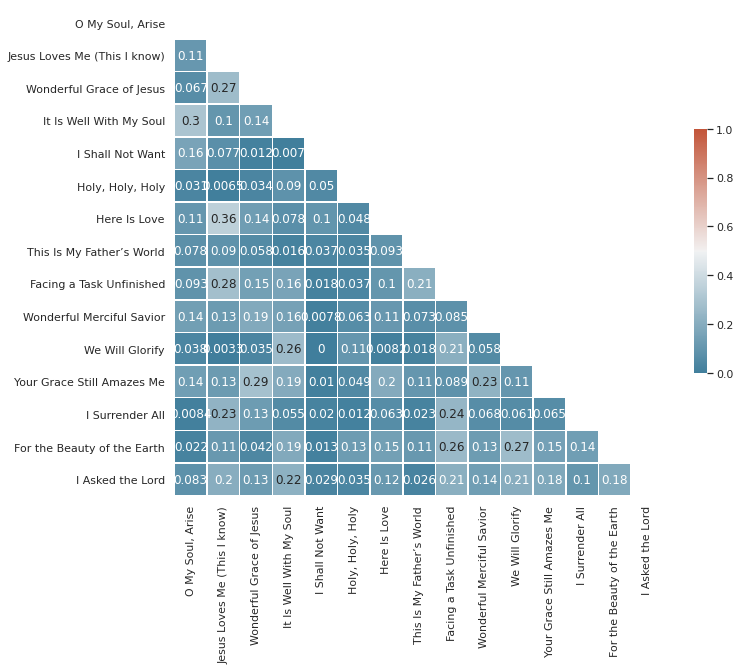

In [ ]:
# This code is referenced from Eric Dratva's notebook, see works cited
# Plotting cosine similarity analysis for CTM

sns.set_theme(style="white")

# Generate dataset
d = pd.DataFrame(data=cosine_similarity(df_cosine_CTM, df_cosine_CTM),
             columns=df_CTM[0:15].title.values)

# Compute the correlation matrix
corr = cosine_similarity(df_cosine_CTM, df_cosine_CTM)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=df_CTM[0:15].title.values,
            yticklabels=df_CTM[0:15].title.values)

Analysis :  From the graph above, we can see that there is little amount of  correlation between top 15 CTM songs. This can be shown by the blue color on the heat map and low correlation number. Thus, we can conclude that each of the top CTM songs are unique.

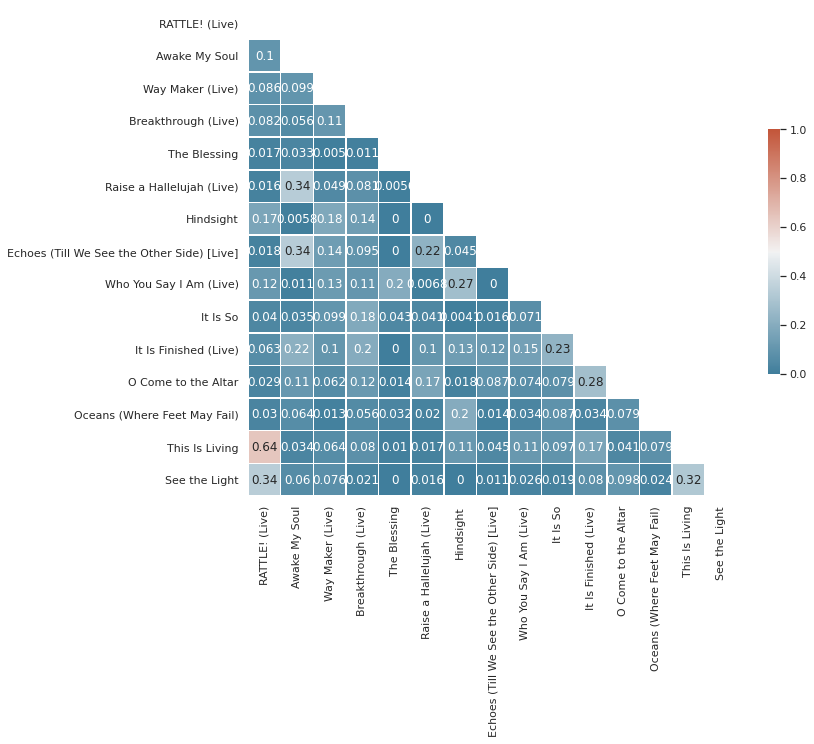

In [ ]:
# This code is referenced from Eric Dratva's notebook, see works cited
# Plotting cosine similarity analysis for CCM

sns.set_theme(style="white")

# Generate dataset
d = pd.DataFrame(data=cosine_similarity(df_cosine_CCM, df_cosine_CCM),
             columns=df_CCM[0:15].title.values)

# Compute the correlation matrix
corr = cosine_similarity(df_cosine_CCM, df_cosine_CCM)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=df_CCM[0:15].title.values,
            yticklabels=df_CCM[0:15].title.values)

Analysis : From the graph above, we can see that there is little amount of correlation between top 15 CCM songs. This can be shown by the blue color on the heat map and low correlation number. There is only one CCM song that has high correlation (i.e., This is Living and RATTLE! with coefficient of 0.64), but this is not enough to conclude that all CCM songs are not unique. Thus, we can conclude that each of the top CCM songs are unique.

##**What kind of emotions do people have while listening to CTM and CCM?**

I am using the NRCLEX library to perform emotional sentiment analysis on my lyrics data. The library provides 10 emotions but I am only going to extract 6 emotions: joy, positive, trust, sadness, negative, and anger

In [ ]:
pip install NRCLex

In [ ]:
from nrclex import NRCLex

In [ ]:
# Raw emotions table for all CTM songs in percentage
# Referenced from NRCLex github, see works cited

df_CTM_emotion=pd.DataFrame()
for i in range(len(CTM_cleaned)):
  text = CTM_cleaned[i]
  emotion = NRCLex(text)
  emotion_raw=emotion.raw_emotion_scores
  df_CTM_emotion=df_CTM_emotion.append([emotion_raw], ignore_index=True)

df_CTM_emotion.index = df_CTM_emotion.index + 1
df_CTM_emotion = df_CTM_emotion.drop(columns=['fear','anticipation','surprise','disgust'])
cols = ['negative', 'sadness', 'joy','positive','trust','anger']
df_CTM_emotion[cols] = df_CTM_emotion[cols].div(df_CTM_emotion[cols].sum(axis=1), axis=0).multiply(100)

df_CTM_emotion.head()

,anger,negative,sadness,positive,trust,joy
1,12.149533,14.953271,10.280374,29.906542,19.626168,13.084112
2,4.651163,6.976744,6.976744,37.209302,6.976744,37.209302
3,6.666667,10.909091,10.303030,36.363636,15.757576,20.000000
4,10.000000,22.000000,10.000000,24.000000,22.000000,12.000000
5,11.475410,13.114754,3.278689,24.590164,24.590164,22.950820


In [ ]:
# Raw emotions table for all CCM songs in percentage
# Referenced from NRCLex github, see works cited

df_CCM_emotion=pd.DataFrame()
for i in range(len(CTM_cleaned)):
  text = CCM_cleaned[i]
  emotion = NRCLex(text)
  emotion_raw=emotion.raw_emotion_scores
  df_CCM_emotion=df_CCM_emotion.append([emotion_raw], ignore_index=True)

df_CCM_emotion.index = df_CCM_emotion.index + 1
df_CCM_emotion = df_CCM_emotion.drop(columns=['fear','anticipation','surprise','disgust'])
cols = ['negative', 'sadness', 'joy','positive','trust','anger']
df_CCM_emotion[cols] = df_CCM_emotion[cols].div(df_CCM_emotion[cols].sum(axis=1), axis=0).multiply(100)

df_CCM_emotion.head()

,negative,sadness,joy,positive,trust,anger
1,12.234043,7.978723,20.212766,29.787234,29.255319,0.531915
2,3.550296,12.426036,26.627219,29.585799,27.218935,0.591716
3,7.589286,8.928571,25.446429,25.892857,25.892857,6.250000
4,7.258065,8.064516,20.161290,38.709677,24.193548,1.612903
5,4.838710,1.612903,30.645161,38.709677,24.193548,NaN


Then, I will use matplotlib library to create stacked bar graphs of my emotional sentiment analysis.


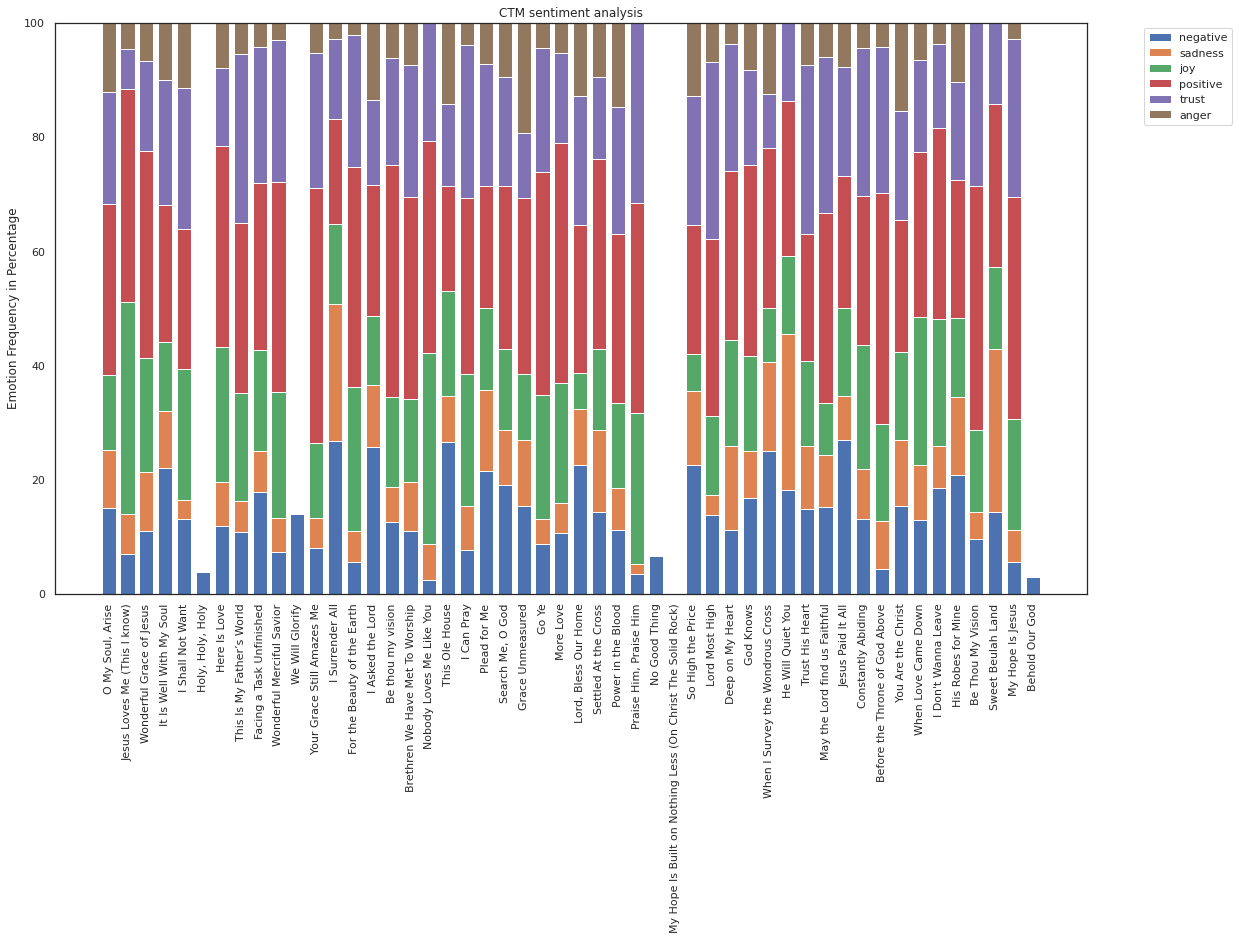

In [ ]:
# Plotting stacked bar graphs for CTM
# Referenced from stackovverflow, see works cited

x=df_CTM.title.values
y1=df_CTM_emotion.negative.values
y2=df_CTM_emotion.sadness.values
y3=df_CTM_emotion.joy.values
y4=df_CTM_emotion.positive.values
y5=df_CTM_emotion.trust.values
y6=df_CTM_emotion.anger.values
width = 0.75

fig, ax = plt.subplots()

ax.bar(x, y1, width, label='negative')
ax.bar(x, y2, width, bottom=y1, label='sadness')
ax.bar(x, y3, width, bottom=y1+y2, label='joy')
ax.bar(x, y4, width, bottom=y1+y2+y3, label='positive')
ax.bar(x, y5, width, bottom=y1+y2+y3+y4, label='trust')
ax.bar(x, y6, width, bottom=y1+y2+y3+y4+y5, label='anger')
plt.xticks(rotation=90)

ax.set_ylabel('Emotion Frequency in Percentage')
ax.set_title('CTM sentiment analysis')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set_size_inches(18.5, 10.5, forward=True)

plt.show()

Analysis: From the plot above, we can see that positive emotions exceeds negative emotions, joy exceeds sadness, and trust exceeds anger by significant amount. This suggests that people experience positive, joy, and trust emotions when they are listening to CTM songs.

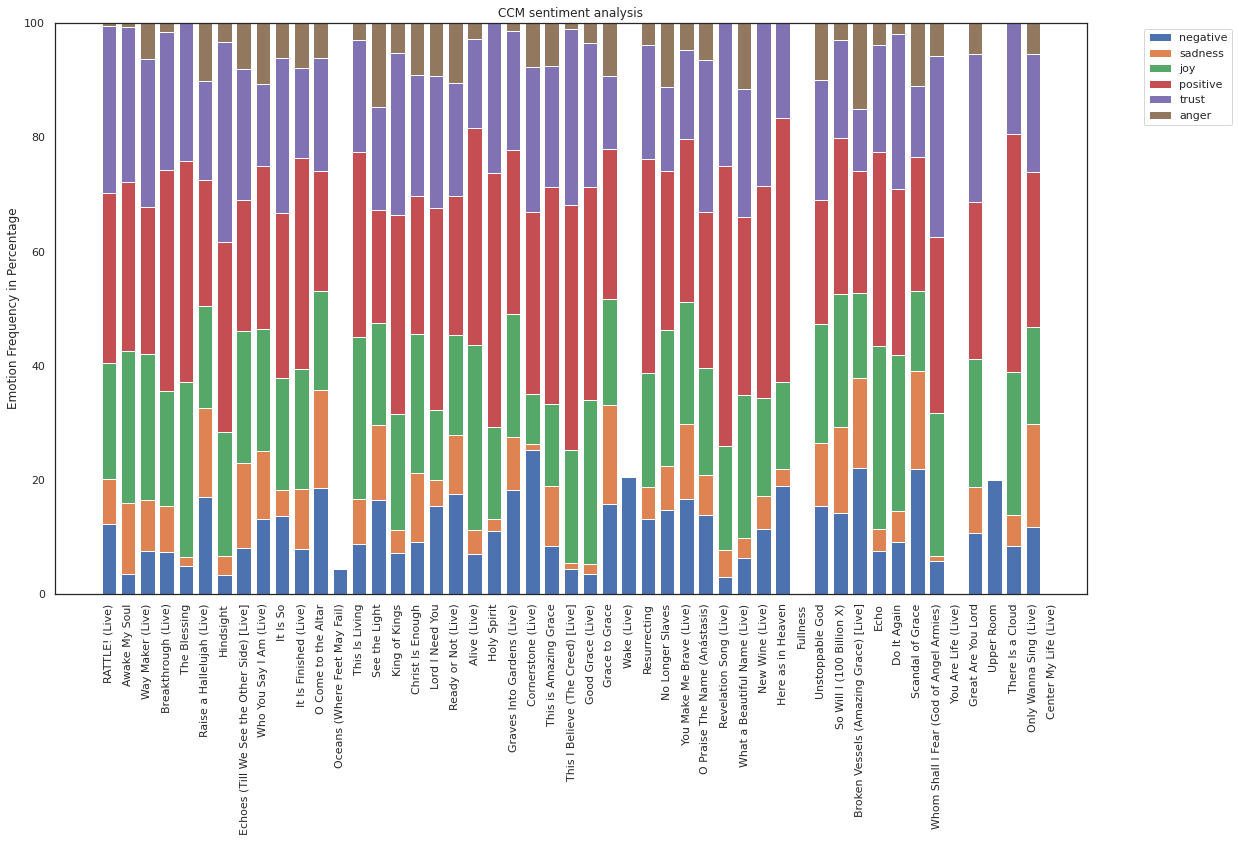

In [ ]:
# Plotting stacked bar graphs for CCM
# Referenced from stackovverflow, see works cited

x=df_CCM.title.values
y1=df_CCM_emotion.negative.values
y2=df_CCM_emotion.sadness.values
y3=df_CCM_emotion.joy.values
y4=df_CCM_emotion.positive.values
y5=df_CCM_emotion.trust.values
y6=df_CCM_emotion.anger.values
width = 0.75

fig, ax = plt.subplots()

ax.bar(x, y1, width, label='negative')
ax.bar(x, y2, width, bottom=y1, label='sadness')
ax.bar(x, y3, width, bottom=y1+y2, label='joy')
ax.bar(x, y4, width, bottom=y1+y2+y3, label='positive')
ax.bar(x, y5, width, bottom=y1+y2+y3+y4, label='trust')
ax.bar(x, y6, width, bottom=y1+y2+y3+y4+y5, label='anger')
plt.xticks(rotation=90)

ax.set_ylabel('Emotion Frequency in Percentage')
ax.set_title('CCM sentiment analysis')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set_size_inches(18.5, 10.5, forward=True)

plt.show()

Analysis: From the plot above, we can see that positive emotions exceeds negative emotions, joy exceeds sadness, and trust exceeds anger by significant amount. This suggests that people experience positive, joy, and trust emotions when they are listening to CCM songs.

##**What are the common words used in CTM and CCM? Is there any correlation between CTM and CCM in term of the words used?**


To make sense of the sentiment analysis score, I will use WordCloud which creates an image composed of prevalent words/bi-grams used in each genres. The size of each word/bi-gram indicates their frequency and importance. The word clouds were generated by first removing stopwords from all lyrics. After that, the word clouds are then generated using PiPy WordCloud package. However, while word clouds are engaging and insightful, some drawbacks include: 1) lack of context in terms of sentence structure, and 2) disorienting random placement and order of words.

WordCloud for CTM music:

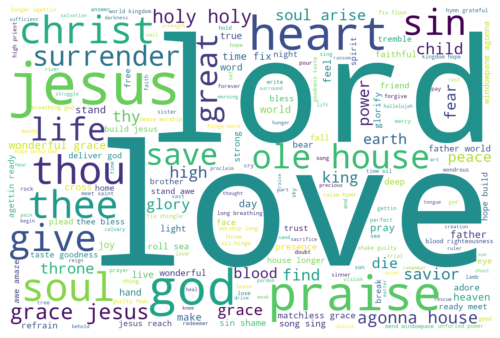

In [ ]:
# This code is referenced from David Julio Panangian's notebook, see works cited
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(CTM_cleaned))
fig = plt.figure(
    figsize = (7, 4.5),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analysis: We can see from the WorldCloud above that CTM songs tends to use words from the past. We can frequent use of words from the past, such as, "thou", "lord", "thee", "holy", etc. And, CTM songs using words that described the attribute and activities God: "thou", "great", "thee", "holy", and so on. Other than that, all the words from the worldcloud seems to promote positivity, joy, and trust, which further supports the conclusion from the sentiment analysis. Finally, on the worldcloud, we can see that the most frequent words are "love" and "lord", which means that the message from CTM is that to love lord.

Worldcloud for CCM music:

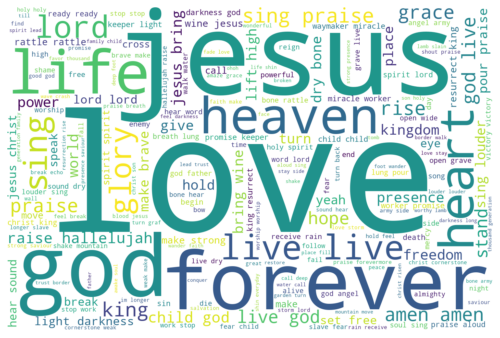

In [ ]:
# This code is referenced from David Julio Panangian's notebook, see works cited
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(CCM_cleaned))
fig = plt.figure(
    figsize = (7, 4.5),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analysis: We can see from the WorldCloud above that CCM songs tends to use words from the present. We can see that there is less use of words from the past and more frequent use of words that people use today, such as, "forever", "life", "live", "glory", "jesus" instead of "lord", etc. CCM focus less on the word of the song and more on the sense of union in the hearing and singing together. This can be seen by the words like: "glory", "sing", "jesus" (more frequent compared to CTM), "hallelujah", and so on. Spelling these word in union out loud generally makes people to feel more emotional and more enthusiastic to sing the song together. Other than that, all the words from the worldcloud seems to promote positivity, joy, and trust, which further supports the conclusion from the sentiment analysis.Finally, Finally, on the worldcloud, we can see that the most frequent words are "love" and "jesus", which means that the message from CTM is that to love jesus.


##**How CTM and CCM differs in term of their audio features?**

To answer this question, I decided to make superimposed histogram for each of the genres audio components. This allows for easy comparison between two genres in terms of each of their audio features.

Before plotting the superimposed histogram, I want to know what is the statistic of my data for further analysis on the histogram.

In [ ]:
# Describing the Data Frame for CTM songs
df_CTM.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.363540,0.274214,-10.856200,0.035668,0.835260,0.031358,0.163876,0.293384,107.820400
std,0.141915,0.115110,3.405425,0.011865,0.176403,0.145521,0.135741,0.137152,28.933259
min,0.102000,0.011300,-25.914000,0.024700,0.121000,0.000000,0.075900,0.072200,69.099000
25%,0.294250,0.200250,-12.425000,0.030125,0.786500,0.000000,0.097800,0.192250,82.769750
50%,0.321000,0.267500,-10.365500,0.032350,0.895500,0.000000,0.132000,0.272000,99.073000
75%,0.440000,0.327750,-9.228250,0.034775,0.934750,0.000012,0.163000,0.356750,127.841500
max,0.732000,0.587000,-4.367000,0.095200,0.993000,0.948000,0.866000,0.666000,188.698000


In [ ]:
# Storing mean and std of the table above

mean_CTM=df_CTM.describe().loc[["mean"]].values
std_CTM=df_CTM.describe().loc[["std"]].values

In [ ]:
# Describing the Data Frame for CCM songs
df_CCM.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.428520,0.640980,-7.007480,0.041288,0.088166,0.000106,0.42586,0.228360,129.246260
std,0.092032,0.187391,1.899354,0.023160,0.182540,0.000473,0.31353,0.146255,22.358305
min,0.254000,0.172000,-14.300000,0.027800,0.000192,0.000000,0.07140,0.056000,73.998000
25%,0.381000,0.521750,-7.815250,0.031325,0.004215,0.000000,0.10950,0.138250,126.222000
50%,0.429500,0.598500,-6.795000,0.033500,0.011000,0.000000,0.33250,0.184500,135.898000
75%,0.465000,0.813250,-6.066500,0.039175,0.061500,0.000004,0.70825,0.277500,142.049500
max,0.638000,0.979000,-3.037000,0.173000,0.928000,0.002680,0.96400,0.825000,171.827000


In [ ]:
# Storing mean and std of the table above

mean_CCM=df_CCM.describe().loc[["mean"]].values
std_CCM=df_CCM.describe().loc[["std"]].values

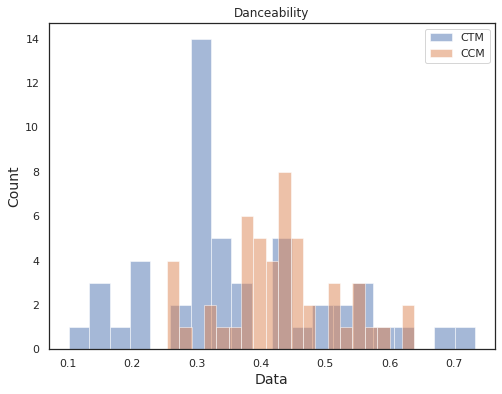

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: danceability

data1=df_CTM.danceability.values
data2=df_CCM.danceability.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Danceability")
plt.legend(loc='upper right')


Analysis: The histogram above is a bit difficult to compare danceability between CTM and CCM. So, I decided to use the statistic table instead to compare. We can see from the statistic table that the danceability mean for CCM is higher compared to that of CTM, and the danceability std for CCM is lower compared to that of CTM. This indicates that overall the danceability of CCM music is higher compared to CTM music. This means that the tempo, beat, and rythm of CCM music is generally higher compared to CTM music.

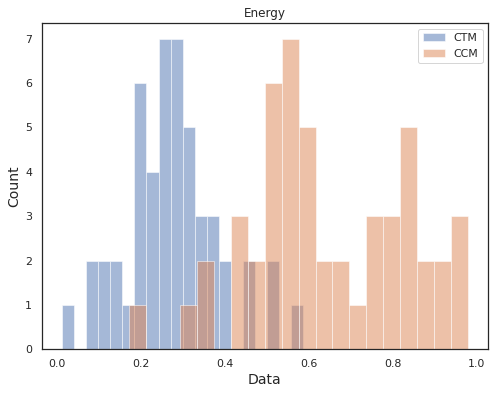

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: energy

data1=df_CTM.energy.values
data2=df_CCM.energy.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Energy")
plt.legend(loc='upper right')


Analysis: From the histogram above, it is clear that the energy of CCM music is higher compared to CTM music. Hence, the CTM music tends to be faster and louder.

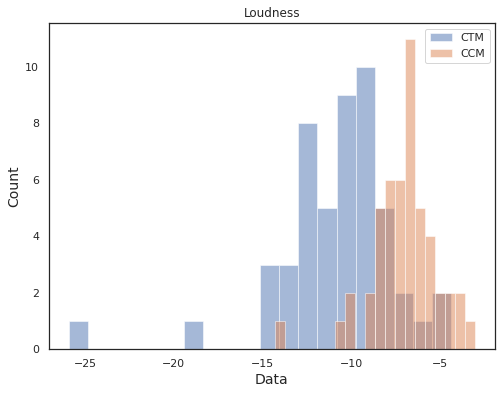

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: loudness

data1=df_CTM.loudness.values
data2=df_CCM.loudness.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Loudness")
plt.legend(loc='upper right')

Analysis: CCM music generally louder compared to CTM music.

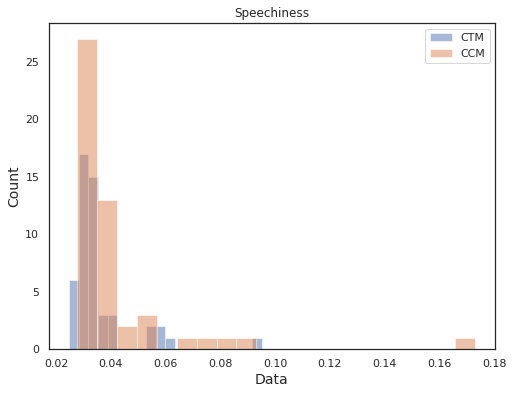

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: speechiness

data1=df_CTM.speechiness.values
data2=df_CCM.speechiness.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Speechiness")
plt.legend(loc='upper right')

The speechiness trend in this case is not clear. When I looked on the statistical table, the statistic for speechiness between CTM and CCM is not much different. And, the histogram suggests that speechiness of CCM is slightly higher compared to CTM. So, I conclude that the speechiness in CCM music is higher compared to CTM music.

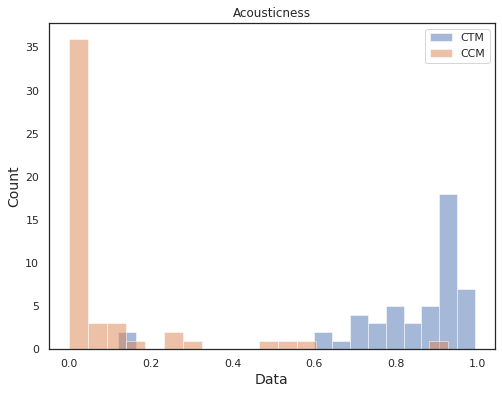

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: acousticness	

data1=df_CTM.acousticness.values
data2=df_CCM.acousticness.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Acousticness")
plt.legend(loc='upper right')

CTM music revolves around traditional music instruments, such as, guitar, violin, and other possible accoustic instruments. On the other hand, CCM is a more modern music. Modern music uses less accoustic instruments. 

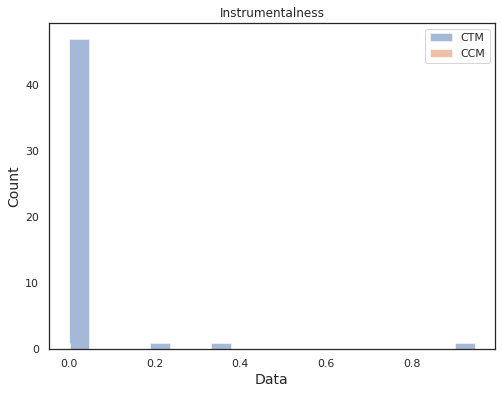

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: instrumentalness

data1=df_CTM.instrumentalness.values
data2=df_CCM.instrumentalness.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Instrumentalness")
plt.legend(loc='upper right')

Analysis: We can see that most of CTM songs falls close to zeros, indicating that there is more vocal involves in CTM songs. In addition, CCM songs are not seen in the histogram because the instrumentalness number is very small. This indicates that CCM songs have more vocal as well. 

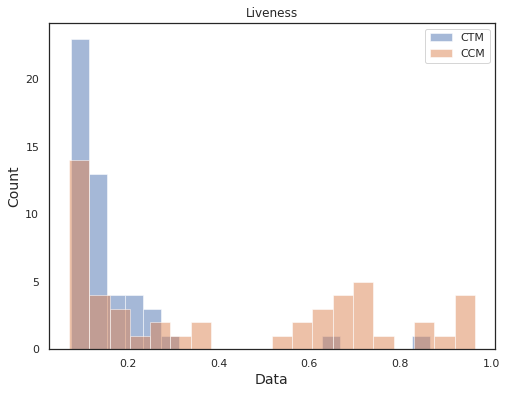

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: liveness	

data1=df_CTM.liveness.values
data2=df_CCM.liveness.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Liveness")
plt.legend(loc='upper right')

Analaysis: It is clear from the histogram that the liveness for CCM is higher compared to that of CTM.

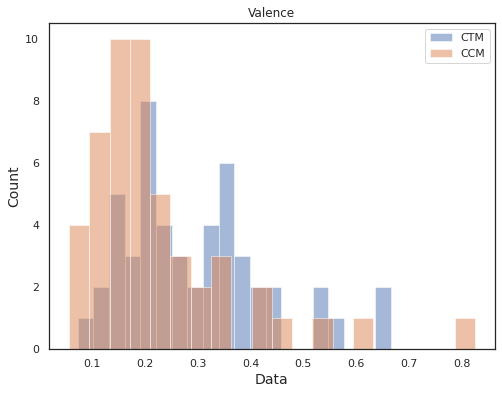

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: valence

data1=df_CTM.valence.values
data2=df_CCM.valence.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Valence")
plt.legend(loc='upper right')

Analysis: It might be difficult to compare the valence between CTM and CCM music both using statistic table and histogram. From the histogram, I see that the valence of CCM tends to be low (since the number of low valence is high). So, I conclude that the valence of CTM is higher compared to that of CCM

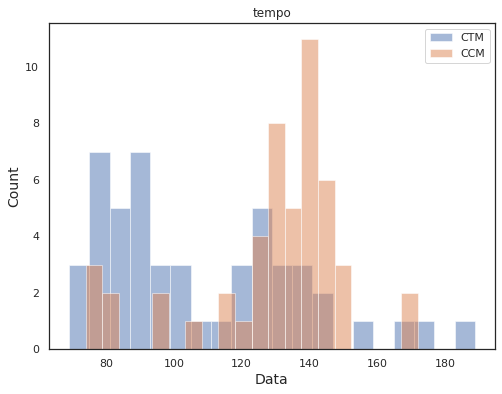

In [ ]:
# Creating superimposed histogram between CTM and CCM for audio component: tempo	

data1=df_CTM.tempo.values
data2=df_CCM.tempo.values

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="CTM")
plt.hist(data2, bins=20, alpha=0.5, label="CCM")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("tempo")
plt.legend(loc='upper right')

Analysis: The tempo in CCM music is generally higher compared to CTM music. Thus, we can say that CCM music has more beat compared to CTM music.

We can see from all the histograms above that it might be difficult to compare whether the audio feature of CTM is overall bigger or smaller than the audio features of CCM.

With the recommendation by the GSI (Thank you Ash Tan!), I decided to do two sample unpaired z-test to see whether the audio feature of CTM is overall bigger or smaller than the audio features of CCM. I have previous experiences from class that allows me to do z-test without much help.


The two unpaired sample paired test will follow these procedures:

1. Define the null hypothesis as:
*   $H_0: Xi \sim N(\mu_{CTM},\mu_{CCM},\sigma^2)$ i.i.d. with $\mu_{CTM}(> or <) \mu_{CCM}$
*   Interpretation: Our hypothesis is to verify whether each audio features CTM is overall bigger or smaller (depending of our previous conclusion using histogram) than each audio features of CCM. Let the distribution of the data to be normal with mean of CTM= $\mu_{CTM}$, mean of CCM= $\mu_{CCM}$, and variance=$\sigma^2$. 
2. Use the significance level of 0.10. 
3. Begin to test our hypothesis for each audio features.






In [ ]:
# Input: compare (0=">", 1="<"), i= features no (0,1,...,8)
# Output: "False" means Hypothesis rejected, "True" means Hypothesis accepted
def z_test(compare,i):
  if compare==0: # miu_CTM>miu_CCM
    x=(mean_CTM.item(i)-mean_CCM.item(i))/((((std_CTM.item(i))**2)/50)+((std_CCM.item(i))**2)/50)**0.5
    p=norm.cdf(x)>0.10
    display(p)
  if compare==1: #miu_CTM<miu_CCM
    x=(mean_CTM.item(i)-mean_CCM.item(i))/((((std_CTM.item(i))**2)/50)+((std_CCM.item(i))**2)/50)**0.5
    p=(1-norm.cdf(x))>0.10
    display(p)

Now, perform z-test for each audio features. The hypothesis I am using is to test whether my conclusion from the histogram is correct or not:

In [ ]:
# Danceability
# Test whether danceability of CTM is lower compared to the danceability of CCM

z_test(1,0)

True

In [ ]:
# Energy
# Test whether energy of CTM is lower compared to the energy of CCM

z_test(1,1)

True

In [ ]:
# Loudness
# Test whether loudness of CTM is lower compared to the loudness of CCM

z_test(1,2)

True

In [ ]:
# Speechiness
# Test whether speechiness of CTM is lower compared to the speechiness of CCM

z_test(1,3)

True

In [ ]:
# Acousticness
# Test whether acousticness of CTM is higher compared to the acousticness of CCM

z_test(0,4)

True

In [ ]:
# Instrumentalness
# Test whether instrumentalness of CTM is higher compared to the instrumentalness of CCM

z_test(0,5)

True

In [ ]:
# Liveness
# Test whether liveness of CTM is lower compared to the liveness of CCM

z_test(1,6)

True

In [ ]:
# Valence
# Test whether valence of CTM is higher compared to the valence of CCM

z_test(0,7)

True

In [ ]:
# Tempo
# Test whether tempo of CTM is lower compared to the tempo of CCM

z_test(1,8)

True

Hence, all of my conclusions from my histograms are correct according to the hypothesis test.

Analysis: To summarize, We can see that CTM songs tends to use more acoustic instrument and have audio features more toward the musical elements of the past.  On the other hand, CCM songs tends to be more energetic, loud, more beat, and more words in it, which matches more toward pop music 

# **Works Cited (for the coding part)**


*   CTM Spotify Playlist ID- 7pOcjSKD8Is86adSn6ST8C
*   CCM Spotify Playlist ID- 39XGsc1HB7SVLFIjc7aBpq
*   Spotify Web API- https://developer.spotify.com/documentation/web-api/
*   Spotipy- https://spotipy.readthedocs.io/en/2.12.0/
*   Spotipy continued- https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
*   Lyric Genius- https://docs.genius.com/
*   Musixmatch API- https://developer.musixmatch.com/documentation
*   Musixmatch- https://pypi.org/project/musixmatch/
*   Hudson Brendon's Github- https://github.com/hudsonbrendon/python-musixmatch
*   John Miller's Github- https://github.com/MageJohn/genius-lyric-finder
*   David Panangian's notebook- https://colab.research.google.com/drive/1VLrT0-OZbj998J-Z_rusYxXDsYCm6n8C#scrollTo=tJIbvpsJsmKk
*   Kezia Liman's notebook- https://colab.research.google.com/drive/1hbNIVNFb4FCa46vLCq4D86N98QdjOz0R#scrollTo=Qm5qRS5DMMpd
*   Sherren Kasmir's notebook-https://colab.research.google.com/drive/1Q32ufWwmFs-6kBDv4Pg2iynMeekHWA0P#scrollTo=KRDQf9_lUX4Y
*   Eric Dratvas' notebook-https://colab.research.google.com/drive/1EWKNMvH10Ch6YWFTZJIuyF4WxGQGdmz-
*   NRCLex github - https://github.com/metalcorebear/NRCLex
*   Stacked bar graph- https://stackoverflow.com/questions/43530494/a-third-stacked-bar-in-matplotlib
*   Superimposed Histogram- https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/
*   z distribution-https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
*   z test-http://courses.ieor.berkeley.edu/ieor165/lecture_notes/ieor165_lec18.pdf





I am also taking reference from Chapter 7 of the Big Data & Social Sciences Textbook on text analysis. This particular chapter helped me in performing text analysis of the song lyrics.
